# Predict whether or not a patient has diabetes, based on certain diagnostic measurements
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases, USA. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- The datasets consists of several medical predictor variables and one target variable, Outcome.

Input Variables (X):

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

Output Variables (y):
- Class variable (0 or 1)

## Import the necessary packages

In [ ]:
from numpy import loadtxt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

2022-07-22 17:33:40.568656: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-22 17:33:40.568678: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load and preprocess the data

In [ ]:
# load the dataset
data = loadtxt('../1_MLP/prima-indians-diabetes.csv', delimiter=',')

In [ ]:
data.shape

(768, 9)

In [ ]:
# split into input (X) and output (y) variables
X = data[:,0:8]
y = data[:,8]

# Define Keras Model

- Models in Keras are defined as a sequence of layers.
- We create a Sequential model and add layers one at a time until we are happy with our network architecture.
- The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the `input_dim` argument and setting it to 8 for the 8 input variables.

**How do we know the number of layers and their types?**

- This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation (I explain more about this here). Generally, you need a network large enough to capture the structure of the problem.


- In this example, we will use a fully-connected network structure with three layers.
- Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the `activation` argument.
- We will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.
- Better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.
- We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2022-07-22 17:33:42.147690: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-22 17:33:42.147774: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shashikala-pc): /proc/driver/nvidia/version does not exist
2022-07-22 17:33:42.148548: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Compile Keras Model

- Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.
- When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.
- We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.
- In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model

- We have defined our model and compiled it ready for efficient computation.
- Now it is time to execute the model on some data.
- We can train or fit our model on our loaded data by calling the fit() function on the model.
- Training occurs over **epochs** and each epoch is split into **batches**.

## What Is a Sample?
- A sample is a single row of data.
- It contains inputs that are fed into the algorithm and an output that is used to compare to the prediction and calculate an error.
- A training dataset is comprised of many rows of data or many samples.
- A sample may also be called an instance, an observation, an input vector, or a feature vector.


## What Is a Batch?
- The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
- Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model.
- A training dataset can be divided into one or more batches.
- When all training samples are used to create one batch, the learning algorithm is called batch gradient descent. When the batch is the size of one sample, the learning algorithm is called stochastic gradient descent. When the batch size is more than one sample and less than the size of the training dataset, the learning algorithm is called mini-batch gradient descent.
- In the case of mini-batch gradient descent, popular batch sizes include 32, 64, and 128 samples. You may see these values used in models in the literature and in tutorials.

**What if the dataset does not divide evenly by the batch size?**

- This can and does happen often when training a model. It simply means that the final batch has fewer samples than the other batches.
- Alternately, you can remove some samples from the dataset or change the batch size such that the number of samples in the dataset does divide evenly by the batch size.

## What Is an Epoch?
- The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
- One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. For example, as above, an epoch that has one batch is called the batch gradient descent learning algorithm.
- You can think of a for-loop over the number of epochs where each loop proceeds over the training dataset. Within this for-loop is another nested for-loop that iterates over each batch of samples, where one batch has the specified “batch size” number of samples.
- The number of epochs is traditionally large, often hundreds or thousands, allowing the learning algorithm to run until the error from the model has been sufficiently minimized.
- It is common to create line plots that show epochs along the x-axis as time and the error or skill of the model on the y-axis. These plots are sometimes called **learning curves**. These plots can help to diagnose whether the model has over learned, under learned, or is suitably fit to the training dataset.

## What Is the Difference Between Batch and Epoch?
- The batch size is a number of samples processed before the model is updated.
- The number of epochs is the number of complete passes through the training dataset.
- The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.
- The number of epochs can be set to an integer value between one and infinity. You can run the algorithm for as long as you like and even stop it using other criteria besides a fixed number of epochs, such as a change (or lack of change) in model error over time.
- They are both integer values and they are both hyperparameters for the learning algorithm.
- **There are no magic rules for how to configure these parameters. You must try different values and see what works best for given problem.**

In [ ]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=30, batch_size=10)

Epoch 1/30
77/77 [==============================] - 0s 674us/step - loss: 3.1516 - accuracy: 0.5469
Epoch 2/30
77/77 [==============================] - 0s 696us/step - loss: 1.9175 - accuracy: 0.5560
Epoch 3/30
77/77 [==============================] - 0s 695us/step - loss: 1.6254 - accuracy: 0.5677
Epoch 4/30
77/77 [==============================] - 0s 708us/step - loss: 1.3801 - accuracy: 0.5755
Epoch 5/30
77/77 [==============================] - 0s 678us/step - loss: 1.1859 - accuracy: 0.5651
Epoch 6/30
77/77 [==============================] - 0s 681us/step - loss: 1.0123 - accuracy: 0.5716
Epoch 7/30
77/77 [==============================] - 0s 698us/step - loss: 0.8738 - accuracy: 0.5872
Epoch 8/30
77/77 [==============================] - 0s 690us/step - loss: 0.8129 - accuracy: 0.6172
Epoch 9/30
77/77 [==============================] - 0s 691us/step - loss: 0.7744 - accuracy: 0.6107
Epoch 10/30
77/77 [==============================] - 0s 689us/step - loss: 0.7399 - accuracy: 0.6393

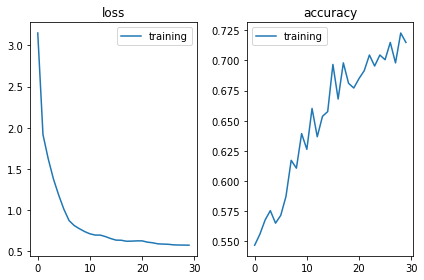

In [ ]:
fig, ax = plt.subplots(1,2)

ax[0].plot(history.epoch, history.history['loss'], label='training')
ax[0].set_title('loss')
ax[0].legend(loc='best')

ax[1].plot(history.epoch,history.history['accuracy'], label='training')
ax[1].set_title('accuracy')
ax[1].legend(loc='best');
fig.tight_layout()
plt.show()

In [ ]:
# evaluate the keras model
model.evaluate(X, y)

24/24 [==============================] - 0s 658us/step - loss: 0.5499 - accuracy: 0.7383


[0.5498797297477722, 0.73828125]

In [ ]:
# Open tensorboard UI in this notebook itself
# %load_ext tensorboard
# %tensorboard --logdir log_dir/ --bind_all